<a href="https://colab.research.google.com/github/RajkumarArigela/EDA_Assgn_by_RAJKUMAR/blob/main/AllcontentbyRajkumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('employees.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
df.head(10)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


##Finding the numerical and categorical columns

In [ ]:
cats_col=list(df.columns[df.dtypes=='object'])
num_col=list(df.columns[df.dtypes!='object'])

In [ ]:
df[cats_col].head()

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,True,Client Services


In [ ]:
df[num_col].head()

,Salary,Bonus %
0,97308,6.945
1,61933,4.170
2,130590,11.858
3,138705,9.340
4,101004,1.389


In [ ]:
df['Salary'].describe()

,Salary
count,1000.000000
mean,90662.181000
std,32923.693342
min,35013.000000
25%,62613.000000
50%,90428.000000
75%,118740.250000
max,149908.000000


##Bivariate analysis

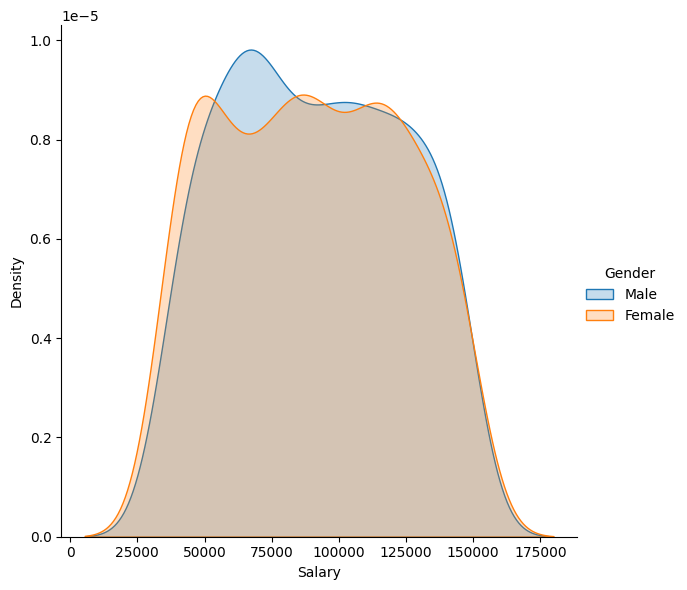

In [ ]:
sns.FacetGrid(df,hue='Gender',height=6).map(sns.kdeplot,'Salary',shade=True).add_legend();
plt.show()

##Mutivariate analysis

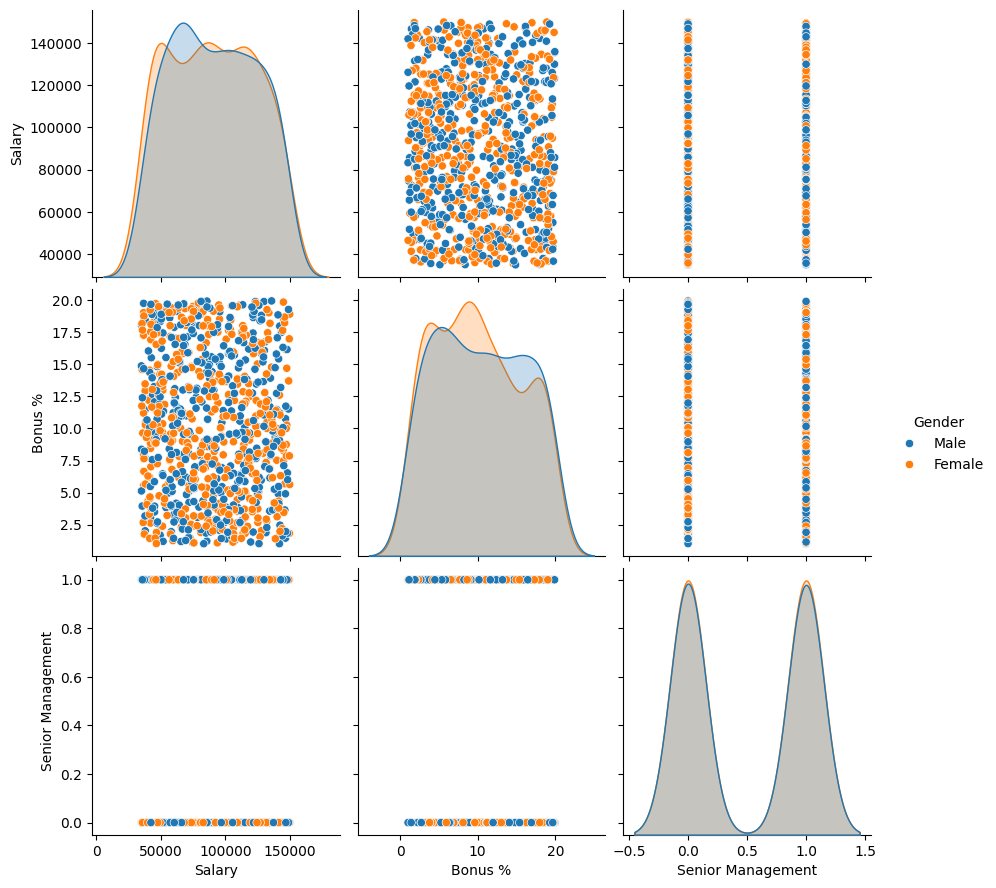

In [ ]:
sns.pairplot(df,hue='Gender',size=3)

##Finding missing values

In [ ]:
df.isnull().sum()

,0
First Name,67
Gender,145
Start Date,0
Last Login Time,0
Salary,0
Bonus %,0
Senior Management,67
Team,43


In [ ]:
df.shape

(1000, 8)

In [ ]:
df['First Name'].astype('str')
df=df.dropna()

In [ ]:
df.isna().sum()

,0
First Name,0
Gender,0
Start Date,0
Last Login Time,0
Salary,0
Bonus %,0
Senior Management,0
Team,0


In [ ]:
df.shape

(764, 8)

In [ ]:
df.fillna(0,inplace=True)#replace all nans with 0
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [ ]:
df['Senior Management']=df['Senior Management'].replace(True,'yes')
df['Senior Management']=df['Senior Management'].replace(False,'No')
df['Team']=df['Team']=df['Team'].replace('NaN','No Team')
df.reset_index(drop=True,inplace=True)
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,yes,Marketing
1,Maria,Female,4/23/1993,11:17 AM,130590,11.858,No,Finance
2,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,yes,Finance
3,Larry,Male,1/24/1998,4:47 PM,101004,1.389,yes,Client Services
4,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,No,Legal


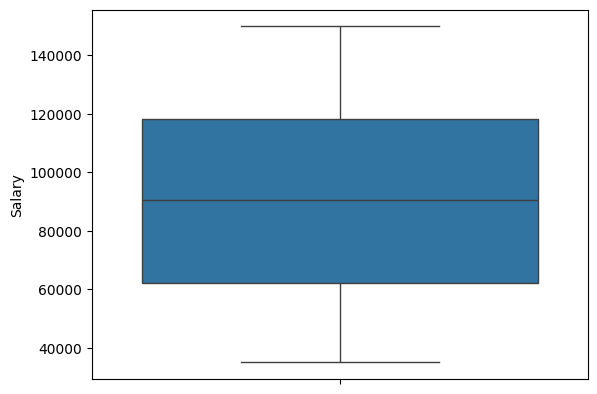

In [ ]:
sns.boxplot(df['Salary'])
plt.show()

CHANGING THE OBJECT TO DATE AND TIME AS DATETIME BY PD.TO_DSTRTIME(DF[])





In [ ]:
df['Start Date']=pd.to_datetime(df['Start Date'])
df['Last Login Time']=pd.to_datetime(df['Last Login Time'])
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         764 non-null    object        
 1   Gender             764 non-null    object        
 2   Start Date         764 non-null    datetime64[ns]
 3   Last Login Time    764 non-null    datetime64[ns]
 4   Salary             764 non-null    int64         
 5   Bonus %            764 non-null    float64       
 6   Senior Management  764 non-null    object        
 7   Team               764 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 47.9+ KB


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2025-06-14 12:42:00,97308,6.945,yes,Marketing
1,Maria,Female,1993-04-23,2025-06-14 11:17:00,130590,11.858,No,Finance
2,Jerry,Male,2005-03-04,2025-06-14 13:00:00,138705,9.340,yes,Finance
3,Larry,Male,1998-01-24,2025-06-14 16:47:00,101004,1.389,yes,Client Services
4,Dennis,Male,1987-04-18,2025-06-14 01:35:00,115163,10.125,No,Legal


###filtering the specific need for you

In [ ]:
df[df['Team']=='Marketing']

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2025-06-14 12:42:00,97308,6.945,yes,Marketing
17,Matthew,Male,1995-09-05,2025-06-14 02:12:00,100612,13.645,No,Marketing
19,Craig,Male,2000-02-27,2025-06-14 07:45:00,37598,7.757,yes,Marketing
31,Marilyn,Female,1980-12-07,2025-06-14 03:16:00,73524,5.207,yes,Marketing
54,Thomas,Male,1995-06-04,2025-06-14 14:24:00,62096,17.029,No,Marketing
...,...,...,...,...,...,...,...,...
706,Nancy,Female,2001-09-10,2025-06-14 23:57:00,85213,2.386,yes,Marketing
715,Lori,Female,2015-11-20,2025-06-14 13:15:00,75498,6.537,yes,Marketing
752,Donna,Female,1982-11-26,2025-06-14 07:04:00,82871,17.999,No,Marketing
756,Rose,Female,2002-08-25,2025-06-14 05:12:00,134505,11.051,yes,Marketing


In [ ]:
df[df['Team'].isin(['Marketing','Legal'])]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2025-06-14 12:42:00,97308,6.945,yes,Marketing
4,Dennis,Male,1987-04-18,2025-06-14 01:35:00,115163,10.125,No,Legal
8,Julie,Female,1997-10-26,2025-06-14 15:19:00,102508,12.637,yes,Legal
17,Matthew,Male,1995-09-05,2025-06-14 02:12:00,100612,13.645,No,Marketing
19,Craig,Male,2000-02-27,2025-06-14 07:45:00,37598,7.757,yes,Marketing
...,...,...,...,...,...,...,...,...
743,Denise,Female,1992-10-19,2025-06-14 05:42:00,137954,4.195,yes,Legal
748,James,Male,1993-01-15,2025-06-14 17:19:00,148985,19.280,No,Legal
752,Donna,Female,1982-11-26,2025-06-14 07:04:00,82871,17.999,No,Marketing
756,Rose,Female,2002-08-25,2025-06-14 05:12:00,134505,11.051,yes,Marketing


In [ ]:
df['Salary']<110000
df['Salary']=pd.to_numeric(df['Salary'],errors='coerce')

In [ ]:
eight_months_ago=pd.Timestamp.today()
pd.DateOffset(months=8)

<DateOffset: months=8>

In [ ]:
filtered_df=df[
     (df['Start Date']>eight_months_ago)&
     (df['Gender']=='Male')&
    (df['Salary']<110000)&
    (df[df['Team'].isin(['Marketing','Legal'])])

filtered_df.head()

TypeError: unsupported operand type(s) for &: 'bool' and 'float'